# Part II - ((Pisa 2021: an overview of Math, reading and science students scores in ODCE and non ODCE countries)
## by (Mohamed Lamouchi)


## Investigation Overview


> Since 2000, the OECD has attempted to evaluate the knowledge and skills of 15-year olds across the world through its Pisa test. More than 510,000 students in 65 economies took part in the latest test, which covered maths, reading and science, with the main focus on maths - which the OECD state is a "strong predictor of participation in post-secondary education and future success."
The triennial results provide a wealth of data - from which countries are making the biggest improvements in education ranking to how the gender gap varies by subject. We've picked out some key figures from the report.


## Dataset Overview

> he original PISA 2012 dataset contained information from 485,490 students and 646 features. After our data cleaning process, we condensed the number of features to 18: country, OECD_country, gender, Mother_Schooling, Mother_Job ,Father_Schooling, Father_Job, cellular_phones, computers,books_at_home, computer_programming, At_Home_Internet_connection, At_school_Internet_connection, Immigration_status, Family_wealth, overall math score, Reading score and  Science score. All features were converted to category type except Math, reaing, sciecne score and Family weatlh

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

# Setup plot parameters
sb.set()
params = {
    'legend.fontsize': 'medium',
    'figure.figsize': (10, 6),
    'axes.labelsize': 'x-large',
    'axes.titlesize': 'xx-large',
    'xtick.labelsize': 'large',
    'ytick.labelsize': 'large'
}
plt.rcParams.update(params)

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_c=pd.read_csv('pisa2012_cleaned.csv')

In [3]:
df_c.head()

,Unnamed: 0,country,OECD_country,Gender,Mother_Schooling,Mother_Job,Father_Schooling,Father_Job,cellular_phones,computers,books_at_home,computer_programming,At_Home_Internet_connection,At_school_Internet_connection,Immigration_status,Family_wealth,Math,Reading,Science
0,0,Albania,Non-OECD,Female,Level 3A,NaN,Level 3A,Part-time,Two,None,0-10,Never or rarely,NaN,NaN,Native,-2.92,366.18634,261.01424,371.91348
1,1,Albania,Non-OECD,Female,Level 3A,Full-time,Level 3A,Full-time,Three or more,Three or more,201-500,Never or rarely,NaN,NaN,Native,0.69,470.56396,384.68832,478.12382
2,2,Albania,Non-OECD,Female,Level 3B or 3C,Full-time,Level 3A,Full-time,Three or more,Two,NaN,Never or rarely,NaN,NaN,Native,-0.23,505.53824,405.18154,486.60946
3,3,Albania,Non-OECD,Female,Level 3B or 3C,Full-time,Level 3A,Full-time,Three or more,One,11-25,NaN,NaN,NaN,Native,-1.17,449.45476,477.46376,453.97240
4,4,Albania,Non-OECD,Female,< Level 1,Part-time,Level 3B or 3C,Part-time,Two,Two,101-200,Sometimes,NaN,NaN,Native,-1.17,385.50398,256.01010,367.15778


## (Visualization 1)

> Using horizontal bars we generate graph containning the top 20 coutries in term of number of students
We can observe that student from Mexico and Italy lead in term of number of student with more than 30000, followed by Spain Canda Brazil Australia United Kingdom.

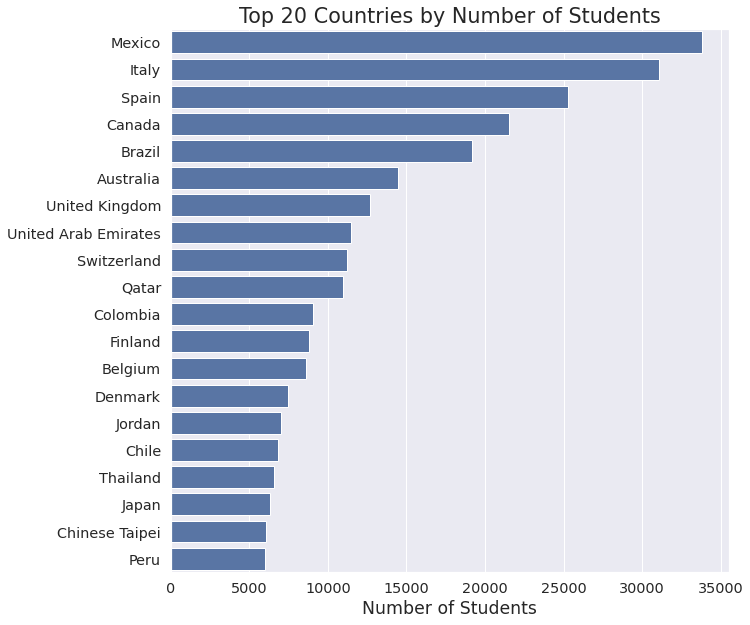

In [4]:
# Get top20 countries
data = df_c['country'].value_counts().head(20)
# Unify the color by storing it into base_color
base_color = sb.color_palette()[0]
# Plot
plt.figure(figsize=[10, 10])
sb.countplot(data=df_c, y='country', order=data.index, color=base_color)
plt.title('Top 20 Countries by Number of Students')
plt.xlabel('Number of Students')
plt.ylabel(None);

## (Visualization 2)

> Shanghai leads the three test foloowed by Asiatic countries. that in Math Reading and science fellowed in second place by Singapore and Hong kong

Text(0.5, 1.0, 'Best 10 performing countries on Math')

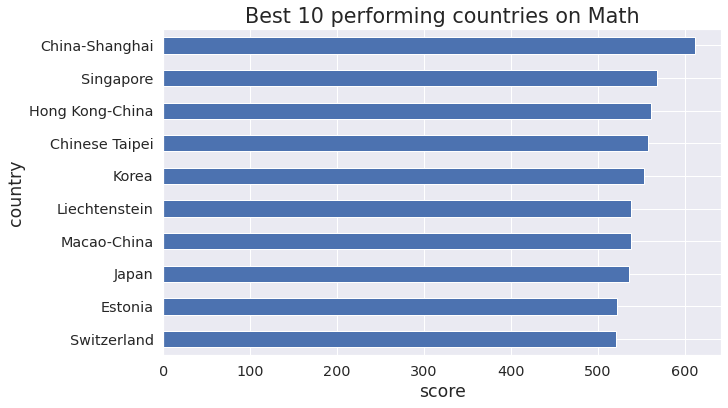

In [5]:
df_c_m=df_c.groupby('country').mean().sort_values(by='Math',ascending=True)['Math'].tail(10).plot(kind='barh')
plt.xlabel('score')
plt.title('Best 10 performing countries on Math')

Text(0.5, 1.0, 'Best 10 performing countries on Reading')

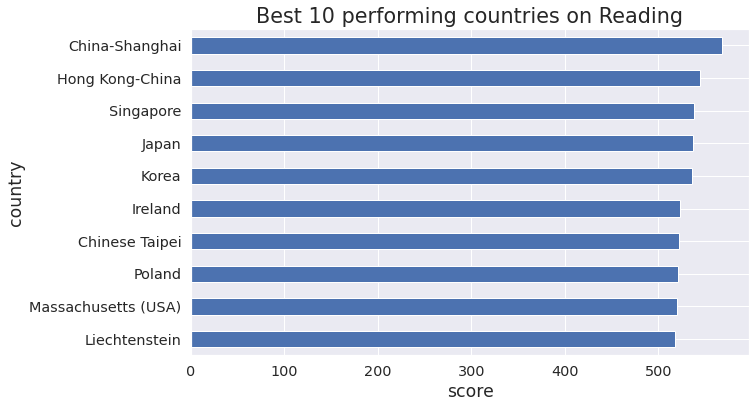

In [6]:
df_c_r=df_c.groupby('country').mean().sort_values(by='Reading',ascending=True)['Reading'].tail(10).plot(kind='barh')
plt.xlabel('score')
plt.title('Best 10 performing countries on Reading')

Text(0.5, 1.0, 'Best 10 performing countries on Science')

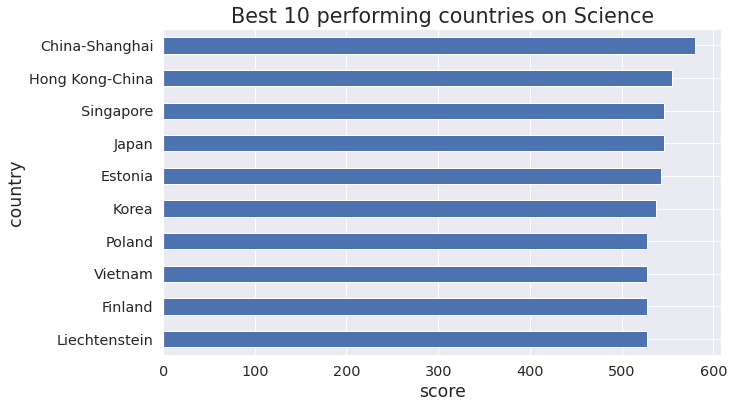

In [7]:
df_c_r=df_c.groupby('country').mean().sort_values(by='Science',ascending=True)['Science'].tail(10).plot(kind='barh')
plt.xlabel('score')
plt.title('Best 10 performing countries on Science')

## (Visualization 3)

>If we look now on top performer countries that have the most outperforming students Asiatics countries still lead inn every metrics 
That's the mark of educatif system that provide a high quality education for it students 

In [8]:
#create a function to get the best countries and find the percentage of outperfom student
def best_score_countries(score):
    # Create a copy
    df_copy = df_c.copy()

    # Take upper quartile threshold
    thr = df_copy[score].max() * 0.75

    # Create outperform property
    df_copy['outperform'] = df_copy[score] > thr

    # Find percentage of outperform students in countries
    dep = df_copy.groupby('country').outperform.mean().mul(100)

    # Plot
    dep.sort_values().tail(10).plot(kind='barh')
    plt.xlim(0, dep.max() + 10)
    plt.title(score)
    plt.xlabel(None)
    plt.ylabel(None)

    # Write the total number after the bar
    indexes, labels = plt.yticks()
    for index, label in zip(indexes, labels):
        val = dep[label.get_text()]
        plt.text(y=index, x=val, s='{:.1f}%'.format(val), va='center')

    #remove x-ticks
    plt.tick_params(axis='x',
                    which='both',
                    bottom=False,
                    top=False,
                    labelbottom=False)

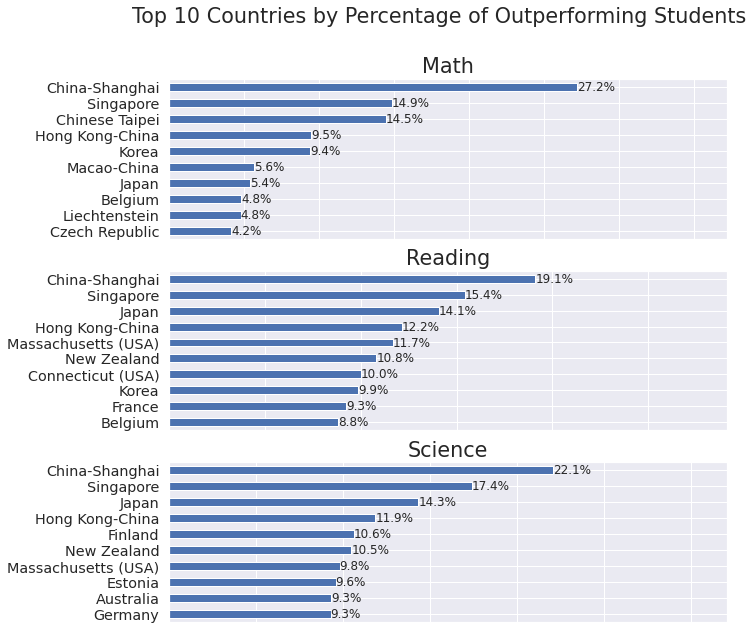

In [9]:

plt.figure(figsize=[10, 10])
plt.suptitle('Top 10 Countries by Percentage of Outperforming Students',
             size='xx-large')

# Plot Math
plt.subplot(3, 1, 1)
best_score_countries('Math')

# Plot Reading
plt.subplot(3, 1, 2)
best_score_countries('Reading')

# Plot Science
plt.subplot(3, 1, 3)
best_score_countries('Science')

## (Visualization 4)

>OCDE in general a wealthy developped countries scores higher than non OCDE countries(oin MLath, Reading and Science), this maybe due to more ressources allocated to education

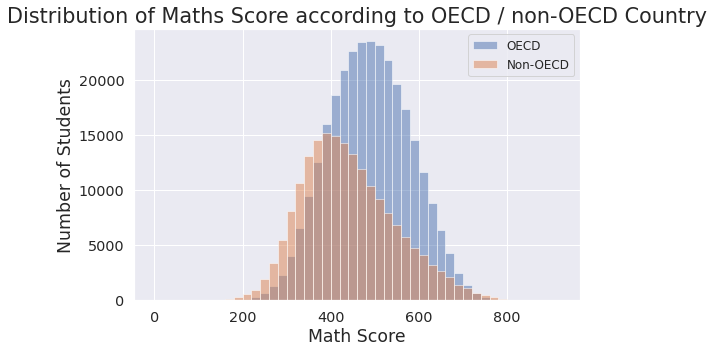

In [10]:
# Histogram for OCDE  and non_OCDE  maths scores
binsize = 20
bins = np.arange(0, df_c['Math'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data=df_c[df_c['OECD_country']=='OECD'], x='Math', bins = bins, label='OECD', alpha=0.5)
plt.hist(data=df_c[df_c['OECD_country']=='Non-OECD'], x='Math', bins = bins, label='Non-OECD', alpha=0.5)
plt.title('Distribution of Maths Score according to OECD / non-OECD Country')
plt.xlabel('Math Score')
plt.ylabel('Number of Students')
plt.legend()
plt.show()


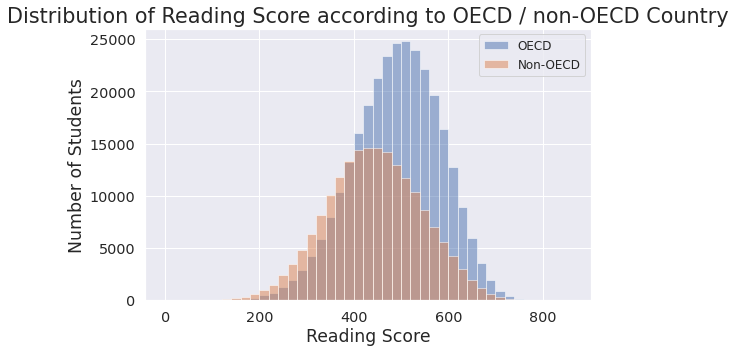

In [11]:
# Histogram for OCDE  and non_OCDE  Reading scores
binsize = 20
bins = np.arange(0, df_c['Reading'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data=df_c[df_c['OECD_country']=='OECD'], x='Reading', bins = bins, label='OECD', alpha=0.5)
plt.hist(data=df_c[df_c['OECD_country']=='Non-OECD'], x='Reading', bins = bins, label='Non-OECD', alpha=0.5)
plt.title('Distribution of Reading Score according to OECD / non-OECD Country')
plt.xlabel('Reading Score')
plt.ylabel('Number of Students')
plt.legend()
plt.show()

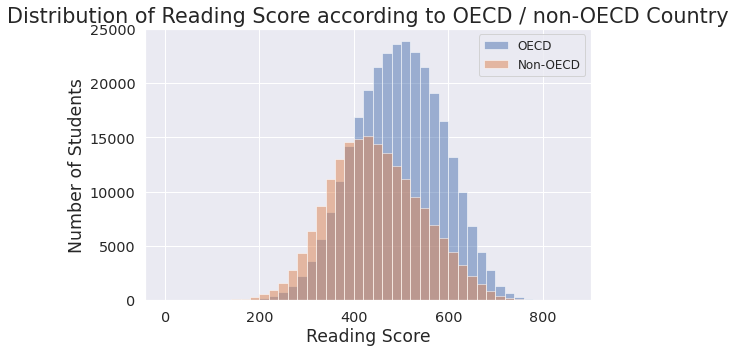

In [12]:
# Histogram for OCDE  and non_OCDE Science scores
binsize = 20
bins = np.arange(0, df_c['Science'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data=df_c[df_c['OECD_country']=='OECD'], x='Science', bins = bins, label='OECD', alpha=0.5)
plt.hist(data=df_c[df_c['OECD_country']=='Non-OECD'], x='Science', bins = bins, label='Non-OECD', alpha=0.5)
plt.title('Distribution of Reading Score according to OECD / non-OECD Country')
plt.xlabel('Reading Score')
plt.ylabel('Number of Students')
plt.legend()
plt.show()

## (Visualization 5)

>If we compare between Math reading and science scores by a random sample of 1000 student and by gender we can see a positive corrolation between math, reading and science.
We can also see that Male performls better on Math while Female better on reading, for science they both do equally.



<AxesSubplot:xlabel='Science', ylabel='Math'>

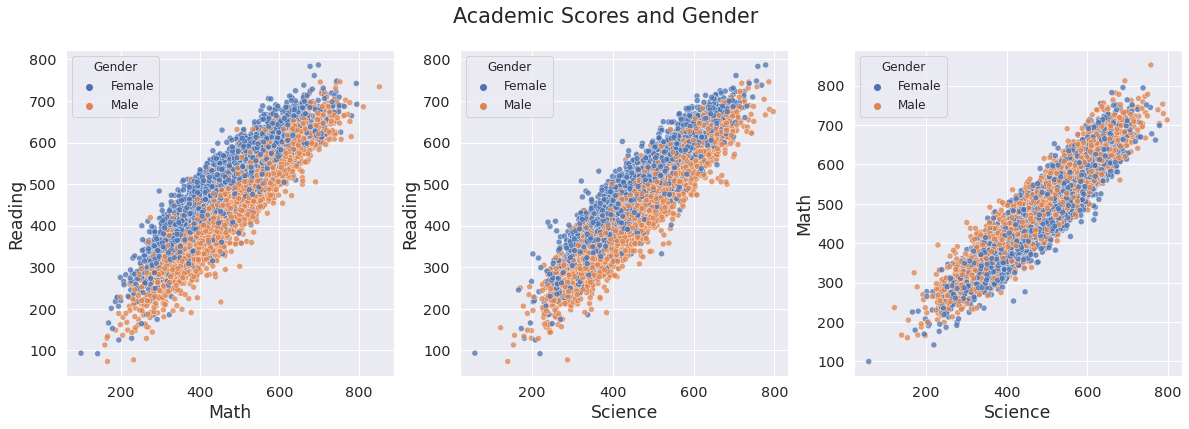

In [13]:
# Plot matrix: sample 10000 students so that plots render faster
samples = np.random.choice(df_c.shape[0], 10000, replace=False)
students_samp = df_c.loc[samples, :]

fig = plt.figure(figsize=[20, 6])
plt.suptitle('Academic Scores and Gender', size='xx-large')

plt.subplot(1, 3, 1)
sb.scatterplot(data=students_samp,
               x='Math',
               y='Reading',
               hue='Gender',
               alpha=0.75)

plt.subplot(1, 3, 2)
sb.scatterplot(data=students_samp,
               x='Science',
               y='Reading',
               hue='Gender',
               alpha=0.75)

plt.subplot(1, 3, 3)
sb.scatterplot(data=students_samp,
               x='Science',
               y='Math',
               hue='Gender',
               alpha=0.75)

## (Visualization 6) 

>With a heat map we confirm the score  correllation but allso we can see that Family wealth does not have corrolation with math reading or science score.

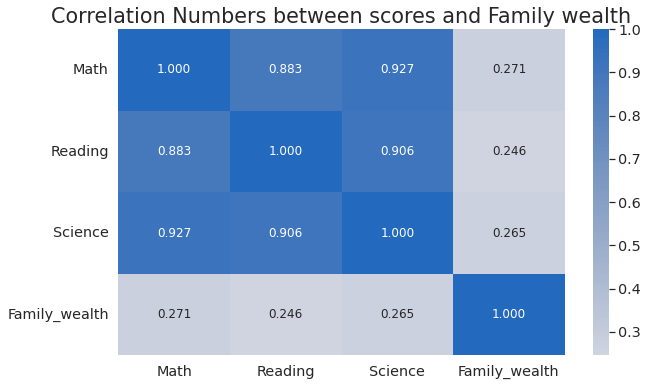

In [14]:
#We create diccionries that group our type to 2 categories numerical and categorical
numeric_vars = ['Math', 'Reading', 'Science', 'Family_wealth']
categoric_vars = ['Gender','Immigration_status', 'computers', 'computer_programming']
family_vars=['Mother_Job','Father_Job','Mother_Schooling', 'Father_Schooling']

# Correlation plot between numerical variable
sb.heatmap(df_c[numeric_vars].corr(),
           annot=True,
           fmt='.3f',
           cmap='vlag_r',
           center=0)
plt.yticks(rotation=0)
plt.title('Correlation Numbers between scores and Family wealth');

## (Visualization 7) 

>We confirm the result of previous slide with a random sample with 500 student

Text(0.5, 1.05, 'Correlationn between scores and Family wealth')

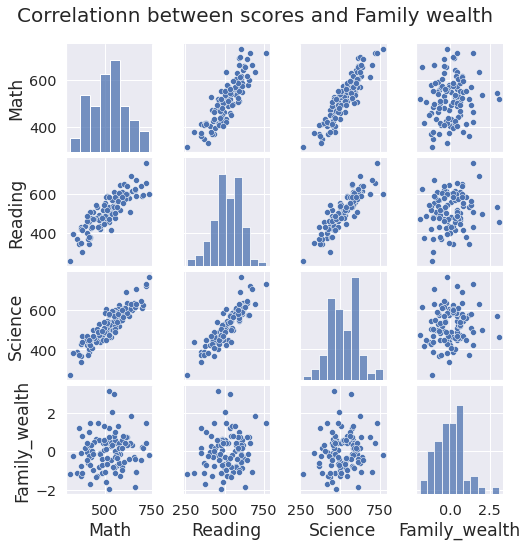

In [15]:
# Plot matrix: sample 500 students so that plots are clearer and
# they render faster
samples = np.random.choice(df_c.shape[0], 500, replace=False)
students_samp = df_c.loc[samples, :].dropna()

sb.pairplot(data=students_samp, vars=numeric_vars, height=1.8).fig.suptitle("Correlationn between scores and Family wealth",
                                                                y=1.05, fontsize=20)


## (Visualization 8) 

>Immigration status does affect Pisa scores as first and second generation performs wors than "native.
Thre is high corrolation between math reading and science score, what is remarkable that computer programming has a negative effect on Math reading and sciecne score
Student with parent who have a full timle job and a higher education perform better

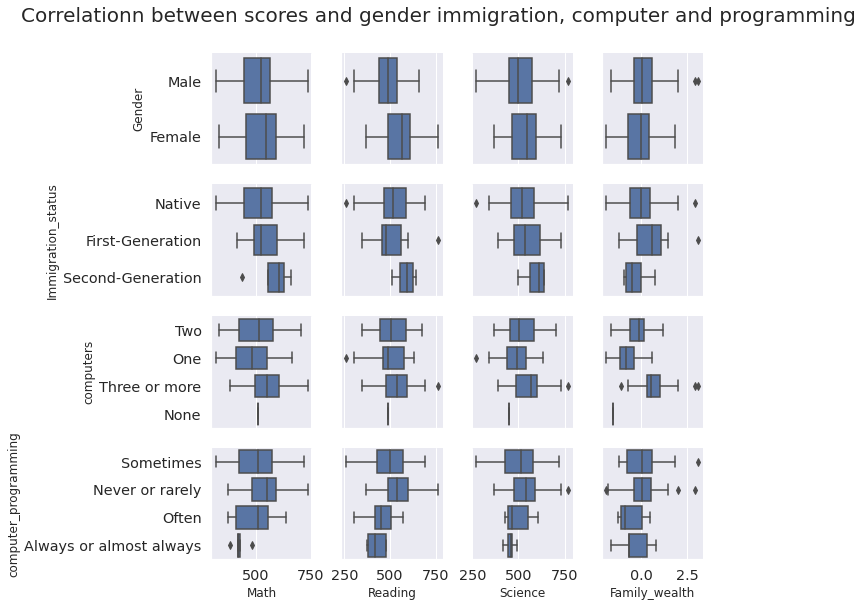

In [25]:
def boxgrid(x, y, **kwargs):
    sb.boxplot(x, y, color=base_color, orient='h')


plt.rcParams["axes.labelsize"] = 12
g = sb.PairGrid(data=students_samp,
                x_vars=numeric_vars,
                y_vars=categoric_vars,
               height=2)
g.fig.suptitle("Correlationn between scores and gender immigration, computer and programming", y=1.05, fontsize=20)
g.map(boxgrid);

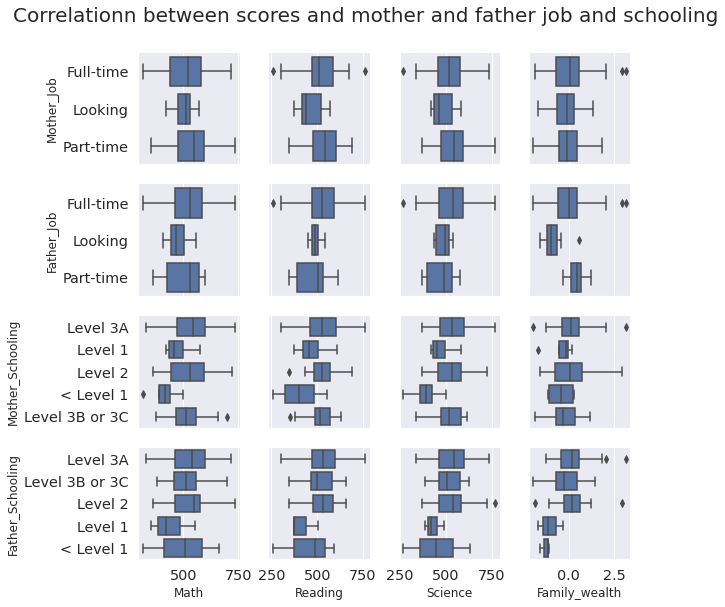

In [24]:
def boxgrid(x, y, **kwargs):
    sb.boxplot(x, y, color=base_color)

plt.rcParams["axes.labelsize"] = 12
h = sb.PairGrid(data=students_samp,
                x_vars=numeric_vars,
                y_vars=family_vars,
               height=2)
h.fig.suptitle("Correlationn between scores and mother and father job and schooling", y=1.05, fontsize=20)
h.map(boxgrid);

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
